In [2]:
import pandas as pd
data = pd.read_csv('creditcard2.csv')
print(data.head())


   Time        V1  Amount  Class
0   0.0 -1.359807  149.62      1
1   0.0  1.191857    2.69      0
2   1.0 -1.358354  378.66      0
3   1.0 -0.966272  123.50      0
4   2.0 -1.158233   69.99      0


In [3]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   Amount  284807 non-null  float64
 3   Class   284807 non-null  int64  
dtypes: float64(3), int64(1)
memory usage: 8.7 MB
None
                Time            V1         Amount          Class
count  284807.000000  2.848070e+05  284807.000000  284807.000000
mean    94813.859575  1.759061e-12      88.349619       0.002616
std     47488.145955  1.958696e+00     250.120109       0.051078
min         0.000000 -5.640751e+01       0.000000       0.000000
25%     54201.500000 -9.203734e-01       5.600000       0.000000
50%     84692.000000  1.810880e-02      22.000000       0.000000
75%    139320.500000  1.315642e+00      77.165000       0.000000
max    172792.000000  2.454930e+00   25691.160000       1.000000
Time      0
V1        

In [4]:
print(data.describe())
print(data.isnull().sum())

                Time            V1         Amount          Class
count  284807.000000  2.848070e+05  284807.000000  284807.000000
mean    94813.859575  1.759061e-12      88.349619       0.002616
std     47488.145955  1.958696e+00     250.120109       0.051078
min         0.000000 -5.640751e+01       0.000000       0.000000
25%     54201.500000 -9.203734e-01       5.600000       0.000000
50%     84692.000000  1.810880e-02      22.000000       0.000000
75%    139320.500000  1.315642e+00      77.165000       0.000000
max    172792.000000  2.454930e+00   25691.160000       1.000000
Time      0
V1        0
Amount    0
Class     0
dtype: int64


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[['Time', 'V1', 'Amount']] = scaler.fit_transform(data[['Time', 'V1', 'Amount']])

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

X = data.drop('Time',axis=1)
y = data['Class']



In [7]:
# training model 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:

### apply regession to train model
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85229
           1       1.00      1.00      1.00       214

    accuracy                           1.00     85443
   macro avg       1.00      1.00      1.00     85443
weighted avg       1.00      1.00      1.00     85443

[[85229     0]
 [    0   214]]


In [9]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85229
           1       1.00      1.00      1.00       214

    accuracy                           1.00     85443
   macro avg       1.00      1.00      1.00     85443
weighted avg       1.00      1.00      1.00     85443

[[85229     0]
 [    0   214]]


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train a Random Forest model
rd = RandomForestClassifier(n_estimators=10, random_state=42)
rd.fit(X_train, y_train)

# Make predictions
y_pred = rd.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[85229     0]
 [    0   214]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85229
           1       1.00      1.00      1.00       214

    accuracy                           1.00     85443
   macro avg       1.00      1.00      1.00     85443
weighted avg       1.00      1.00      1.00     85443



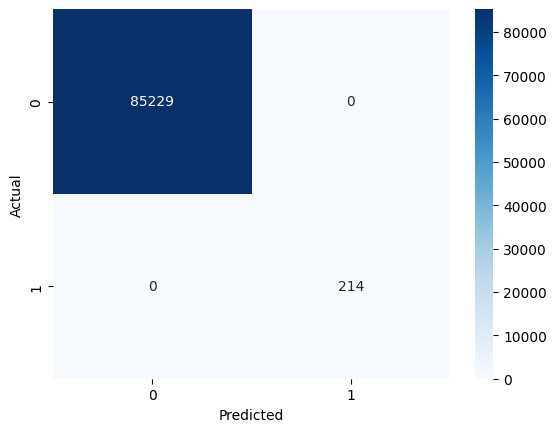

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [12]:
print(y_test)

43428     1
49906     0
29474     0
276481    0
278846    0
         ..
180795    0
259979    0
21885     0
217812    0
86348     0
Name: Class, Length: 85443, dtype: int64


In [13]:
# Prediction function
def predict_class(plot_summary, model):
    plot_summary_tfidf = scaler.transform([plot_summary])
    predicted_class = model.predict(plot_summary_tfidf)
    return predicted_class[0]

In [16]:
# Example prediction
new_plot = [37	,1.295667621	,0.99]

print("Prediction of card class (Logistic Regression):", predict_class(new_plot, lr))
print("Prediction of card class (DecisionTreeClassifier):", predict_class(new_plot, dt))
print("Prediction of card class (random forest):", predict_class(new_plot, rd))

Prediction of card class (Logistic Regression): 0
Prediction of card class (DecisionTreeClassifier): 0
Prediction of card class (random forest): 0


c:\Users\awadh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\awadh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\awadh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\awadh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\awadh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but 